# Identifikasi Jenis Batu Mulia Berdasarkan Spektrum

Neural Network adalah pertemuan saling berhubungan dari elemen pemrosesan sederhana, unit atau node, yang fungsi secara bebas didasarkan pada neuron hewan. Itu pengolahan kemampuan jaringan disimpan dalam antarsatuan kekuatan sambungan, atau bobot, diperoleh dengan proses adaptasi, atau belajar dari, satu set pelatihan pola.

1. Konsep Dasar Neural Network

Neural network terdiri atas beberapa elemen penghitung tak linier yang masing-masing dihubungkan melalui suatu pembobot dan tersusun secara paralel. Pembobot inilah yang nantinya akan berubah (beradaptasi) selama proses pelatihan. Pelatihan perlu dilakukan pada suatu neural network sebelum digunakan untuk menyelesaikan masalah. Hasil pelatihan neural network dapat diperoleh tanggapan yang benar (yang diinginkan) terhadap masukan yang diberikan. Neural network dapat memberikan tanggapan yang benar walaupun masukan yang diberikan terkena derau atau berubah oleh suatu keadaan.



2. Perancangan Sistem

Secara umum sistem menggunakan 2 mode, yaitu learning dan
identifikasi. Pada saat learning dilakukan menggunakan PC dan
software MATLAB dengan alur sesuai dengan flowchart dibawah ini:
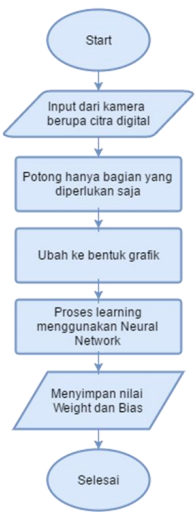
(alur program saat learning)
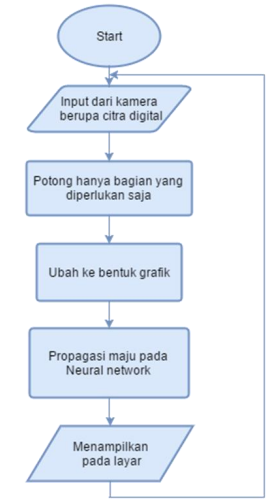
(alur program pada Raspberry Pi)

Awalnya pengambilan data berupa gambar. Kemudian gambar tersebut dipotong agar hanya bagian yang diperlukan saja yang diolah. Setelah itu gambar hasil potongan tersebut diubah menjadi grafik kecerahan. Dari nilai grafik kecerahan inilah yang akan menjadi masukan dari jaringan saraf tiruan. Pada jaringan saraf tiruan, dilakukan proses pembelajaran sampai mendapatkan nilai weight dengan error yang kecil. Nilai weight itulah yang disimpan untuk digunakan pada _Raspberry Pi_.   
Setelah didapatkan nilai weight yang dibutuhkan, nilai tersebut dipindahkan ke Raspberry Pi untuk selanjutnya digunakan dalam propagasi maju pada Neural Network. Hasil propagasi maju tersebut kemudian ditampilkan pada layar jenis batu mulia yang terdeteksi.  Dalam perancangan sistem yang mengudentifikasikan jenis batu mulia ini, Raspberry Pi berfungsi sebagai penghubung dari semua sistem dan sebagai sumber komputasi. Data yang dibutuhkan diambil menggunakan modul kamera PiCamera kemudian diolah menggunakan software Python dengan tambahan library OpenCV. Hasil dari pengolahan data ini akan ditampilkan pada layar.

 a. Perancangan Perangkat Lunak

perancangan perangkat lunak semuanya terintegrasi kedalam _Raspberry Pi_ sebagai single board computer. Proses yang dilakukan mulai dari pembacaan kamera, mengidentifikasikan jenis batu mulia, hingga penampilannnya pada layar dilakukan dalam satu prosesor _Raspberry Pi_ itu sendiri. 

- Bahasa pemograman yang digunakan  
Python adalah bahasa pemrograman interpretatif multiguna dengan filosofi perancangan yang berfokus pada tingkat keterbacaan kode. Python diklaim sebagai bahasa yang menggabungkan kapabilitas, kemampuan, dengan sintaksis kode yang sangat jelas, dan dilengkapi dengan fungsionalitas library standar yang besar serta komprehensif. Sesuai kemampuan bahasa pemrograman Python yang luas, dan juga mencakup library OpenCV, maka Python adalah
bahasa pemrograman yang cocok untuk digunakan pada Raspberry.

- Pengambilan gambar  
Untuk mengolah gambar pada Raspberry Pi menggunakan software Python dan OpenCV sebagai library-nya. Kemudian program yang digunakan agar gambar dapat tersimpan di folder ‘images’ dengan nama file c1.png adalah sebagai berikut dengan bentuk gambar yang sudah diambil tersimpan dalam variabel 'frame' dalam bentuk matriks 2 dimensi.

In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
ret,frame = cap.read()

while(True):
    cv2.imshow('imgl',frame)
    if cv2.waitKey(1) & 0xFF == ord('y'):
    cv2.imwrite('images/c1.png',frame)
    cv2.destroyAllWindows()
    break

cap.release()

IndentationError: expected an indented block (<ipython-input-3-2817afc9ea60>, line 10)

- Template matching  
Resolusi template telah ditentukan sebesar 200 x 62 sehingga pada saat pengambilan data akan tepat menjadi 200 data. fungsi dari penggunaan template matching disini adalah agar pengambilan titik piksel yang dibutuhkan dapat lebih disederhanakan lagi dan dibuat sama lebarnya, yaitu 200 x 62 piksel. Template matching ini sama sekali tidak mengubah data yang telah diambil karena setelah menemukan titik yang tepat, maka gambar akan dipotong, kemudian hasil potongan gambar tersebut yang digunakan sebagai input pada proses selanjutnya.

- Pemotongan gambar dan akses nilai pixel  
Sistem gambar sebenarnya sama persis dengan matriks 2 dimensi. Maka untuk memotong gambar cukup dibuat matriks baru kemudian hanya diambil beberapa bagian dari matriks gambar awalnya. Rumus pengambilannya sebagai berikut:
$ 𝑇𝑎𝑟𝑔𝑒𝑡 = 𝑠𝑟𝑐[𝑥: (𝑥 + ℎ), 𝑦: (𝑦 + ℎ)] $
Dimana nilai x dan y ditentukan bedasarkan hasil lokasi dari _template matching_.  
Kemudian untuk mengakses nilai pada suatu pixel maka cukup mengetikkan lokasi titik pixel pada gambar kemudian ditambah nilai warna yang mau diakses. Urutan nilai warnanya di OpenCV adalah 0 = biru, 1 = hijau, 2 = merah.Pada kasus ini, nilai setiap titik warna pada suatu garis horizontal diambil kemudian dijumlahkan agar dapat menjadi suatu grafik tertentu


 b. Jaringan Saraf Tiruan
 
Pada kasus ini, rancangan input-output dari neural network menggunakan 200 input, 10 hidden layer, dan 7 layer output. 200 input merupakan jumlah pixel secara horizontal pada gambar spektrum yang diambil. Kemudian untuk 7 layer output merupakan jumlah batuan yang dapat diidentifikasi. Pada setiap layer ke layer yang lain memiliki nilai weight sendiri yang mana nilai ini fungsinya sebagai penghubung antar neuron.

- Propagasi Maju  
Selama propagasi maju, sinyal masukan (SetInput) dipropagasikan ke layar tersembunyi menggunakan fungsi aktivasi yang ditentukan. Keluaran dari setiap unit layar tersembunyi akan dipropagasikan lagi ke layar output yang kemudian keluar hasilnya. Rumus yang digunakan untuk propagasi pada layar masukan ke layar tersembunyi adalah sebagai berikut:  

 $ v1_k = ∑w1_{i,k} * SetInput_{(i)} $  
 $ y1_k = \frac{1}{1+exp(-v1_k)} $

 Dimana: 
 i = neuron pada layar input
 k = neuron pada layar tersembunyi

 kemudian untuk layar tersembunyi ke layar output menggunakan rumus berikut:  
 $ v2_k = ∑w2_{i,k} * y1_{(i)} $ 
 $ y2_k = \frac{1}{1+exp(-v2_k)} $

 Dimana: 
 i = neuron pada layar tersembunyi
 k = neuron pada layar input

 Nilai w1 dan w2 pada awalnya adalah random, kemudian diambil pengurangan  nilai output y2 oleh target(T).

- Propagasi Mundur  
Selisih antara keluaran jaringan dengan target yang diinginkan merupakan kesalahan yang terjadi. Kesalahan yang terjadi itu dipropagasi mundur. Dimulai dari garis yang berhubungan langsung dengan unit-unit di output layer. Untuk mencari nilai :  

 $ o_j = ∑y1_i * w2_{j,i} $  
 $ do_j = (\frac{1}{1+exp(o_j)} \times (1 - \frac{1}{1+exp(o_j)})) \times (T_j - y2_j) $

 Dimana:  
 i = neuron pada layar tersembunyi
 j = neuron pada layar output

 kemudian untuk layar tersembunyi ke layar input menggunakan rumus sebagai berikut:
 $ p_j = ∑do_h * w2_{j,h} $  
 $ q_j = ∑SetInput_i * w1_{j,i} $  
 $ do_j = (\frac{1}{1+exp(q_j)} \times (1 - \frac{1}{1+exp(q_j)})) \times (p_j) $  

 Dimana :  
 h = neuron pada layar input
 i = neuron pada layar tersembunyi
 j = neuron pada layar output

- Perbaharui Nilai _Weight_  
Nilai _Weight_ pada awalnya merupakan nilai random. Dapat
dipastikan bahwa output-nya pasti tidak sesuai. Untuk itu nilai
weight perlu diperbarui agar nilainya makin lama makin sesuai.
Berikut adalah rumus untuk memperbarui nilai _weight_:  

 $ w2_{i,j} baru = w2_{i,j} + \mu \times do_j \times y1_i $  

 Dimana:  
 i = neuron pada tersembunyi
 J = neuron pada layar output

 $ w1_{i,j} baru = w1_{i,j} + \mu \times dh_j \times SetInput_i $

 Dimana:  
 i = neuron pada input
 J = neuron pada layar tersembunyi

 Nilai weight 𝑤1 dan 𝑤2 yang baru tersebut akan menggantikan nilai weight yang lama. Kemudian proses ini kembali ke propagasi maju dan diulang terus hingga error toleransinya lebih kecil dari 10^{-10}.

3. pengujian pada pembahasan sistem

 - pembelajaran Neural Network  
Pada neural network dibutuhkan input berupa sample data yang akan dipelajari. Dari data tersebut dimasukkan rumus agar mendapat nilai weight yang diperlukan. Ketika nilai weight sudah didapatkan maka untuk selanjutnya cukup menjalani proses forward bias dari benda yang akan diuji.  
Batu yang digunakan sebagai sampel ada 7 jenis batu dan setiap batu diambil 2 kali pengambilan data. Batu yang diambil sampelnya adalah batu Amethyst, batu akik jenis ati ayam, batu akik jenis siwalan pecah seribu, batu akik jenis ijo lumut, batu Agate Chalcedony jenis merah, batu Agate Chalcedony jenis madu banyumili, dan batu Agate Chalcedony jenis jujung derajat. Berikut grafik berdasarkan komposisi spektrum warna yang dihasilkan saat pengambilan data:  

 + Grafik pada Batu amethyst (769 – 203nm)  
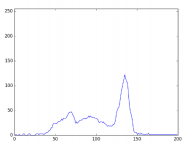  
 + Grafik pada Batu akik-ati ayam
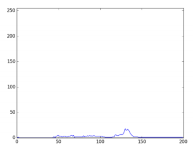  
 + Grafik pada Batu akik-siwalan pecah seribu (769 – 203nm)  
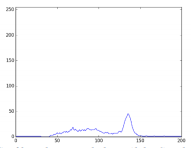  
 + Grafik pada Batu akik – ijo lumut (769 – 203nm)  
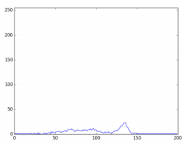  
 + Grafik pada Batu Agate Chalcedony – Merah (769 – 203nm)   
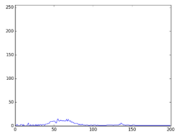   
 + Grafik pada Batu Agate Chalcedony – Madu Banyumili (769 – 203nm)  
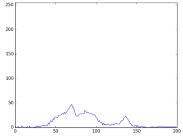  
 + Batu Agate Chalcedony – Jujung Drajat (769 – 203nm)  
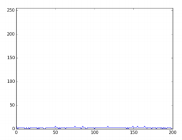

Nilai grafik batu di atas sebagai nilai input yang akan diperlukan untuk proses learning. Setelah dilakukan proses propagasi maju, propagasi mundur, update nilai weight secara berulang-ulang didapatkan nilai error yang kurang dari 10−3. Nilai weight inilah yang akan digunakan sebagai propagasi maju pada deteksi batu mulia menggunakan Raspberry Pi. Nilai error per-iterasi ditampilkan pada gambar dibawah ini.  
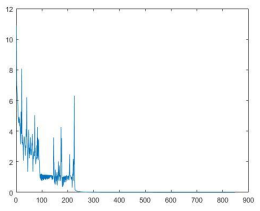

In [7]:
#Lampiran program pada python

import math
import numpy as np
import cv2
import time
def sigm(inputan):
     y = float(1 / (1 + math.exp(-float(inputan))))
     return y
def forward(inp,w1,w2):
     w1a = len(w1)     #200
     w1b = len(w1[0])  #10
     w2a = len(w2)     #10
     w2b = len(w2[0])  #3
     v1 = np.zeros(w1b)
     y1 = np.zeros(w1b)
     v2 = np.zeros(w2b)
     y2 = np.zeros(w2b)
     o2 = np.zeros(w2b)

     for i in range(w1b):
         for j in range(w1a):
             v1[i]=v1[i] + w1[j][i]*inp[j]
         y1[i] = sigm(v1[i])
     for i in range(w2b):
         for j in range(w2a):
             v2[i] = v2[i] + w2[j][i]*v1[j]
         y2[i] = (sigm(v2[i]))
         o2[i] = round(sigm(v2[i]))
     return o2
def inputw1(direktori,ukuran):
     a,b = ukuran
     f = open(direktori,"r")
     f001 = f.readlines()
     f002=[]
     weight=np.zeros([a,b])
     for i in range(a):
         f002.append(f001[i].split(' '))
     for i in range(a):
         for j in range(1,b+1):
             f003 = f002[i][j]
             weight[i][j-1] = float(f003)
     return weight
def inputw2(direktori,ukuran):
 a,b = ukuran
 f = open(direktori,"r")
 f001 = f.readlines()
 f002=[]
 f004=np.zeros([a,b])
 weight=np.zeros([a,b])
 for i in range(a):
     f002.append(f001[i].split(' '))
 for i in range(a):
     for j in range(1,b+1):
         f003 = f002[i][j]
     weight[i][j-1] = float(f003)
 return weight
def deteksi(inputan):
     print ("Jenis batu: "),
     if (inputan[0]==1):
         print ("Amethyst")
     if (inputan[1]==1):
         print ("Akik - Lavender")
     if (inputan[2]==1):
        print ("Akik - Siwalan Pecah 1000")
def ambilgambar():
     cap = cv2.VideoCapture(0)
     time.sleep(2)
     while(1):
         _,img = cap.read()
         cv2.imshow('webcam',img)
         if cv2.waitKey(1) == 27:
             break
     cap.release()
     cv2.destroyAllWindows()
     return img
def crop(image):
     template = cv2.imread('spectrum.jpg')
     _,tsizew,tsizeh = template.shape[::-1]
     res = cv2.matchTemplate(image,template,cv2.TM_SQDIFF)
     miv,mav,mil,mal = cv2.minMaxLoc(res)
     cropped = img[mil[1]:mil[1]+int(tsizeh), mil[0]:mil[0]+int(tsizew)]
     while(1):
         cv2.imshow('cropped',cropped)
         if cv2.waitKey(1) == 27:
             break
     cv2.destroyAllWindows()
     h,w,_ = cropped.shape[::]
     w = int(w)
     for i in range(w):
         ytengah = h/2
         pixel = cropped[ytengah, i]
         setinput.append(int(pixel[0])+int(pixel[1])+int(pixel[2]))
     return setinput

img = ambilgambar()
cropped = crop(img)

for i in range(len(setinput)):
     setinput[i] = float(setinput[i]) / 255
target = [0,0,0]
layer1 = 10
li = 1
pi = len(setinput) #200
lo = 1
po = len(target) # 3
weight1 = inputw1("D:\Tugas\TugasAkhir\Program\matlab\w1.txt",[200,10])
weight2 = inputw2("D:\Tugas\TugasAkhir\Program\matlab\w2.txt",[10,3])
                  
batu = forward(setinput,weight1,weight2)
deteksi(batu)

ModuleNotFoundError: No module named 'cv2'

Resource:
http://repository.its.ac.id/3841/2/2212100063-Undergraduate-Theses.pdf